# Applying the best model on test data

In [1]:
#Installing the necessary libraries
!pip install pandas
!pip install openpyxl
!pip install sklearn
!pip install matplotlib
!pip install scikit-optimize
!pip install numpy
!pip install shap
!pip install catboost
!pip install xgboost
!pip install shap

In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVR
from skopt import BayesSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from skopt.space import Integer, Real, Categorical 
from sklearn import utils
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBRegressor
import math
import shap

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
import shap
plt.style.use('seaborn')

c:\Users\lera-\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import re
import pubchempy as pcp
from sklearn import svm
from sklearn.svm import SVR
from skopt import BayesSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from skopt.space import Integer, Real, Categorical 
from sklearn import utils
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBRegressor

import shap

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Descriptors3D
from rdkit.Chem import rdchem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.rdchem import PeriodicTable, GetPeriodicTable
from rdkit.Chem import Fragments
from rdkit.Chem.rdchem import EditableMol
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from rdkit.Chem import PyMol
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec

###  Working with the table
First you need to edit the table a little and see its main characteristics for further machine learning

In [4]:
#We move the predicted column to the end for convenience
db_final1 = pd.read_excel('viscosity_df_ML.xlsx')
db_final = db_final1.drop(columns=['Viscosity, cP'])
db_final.insert(0, 'Viscosity, cP', db_final1['Viscosity, cP'])

In [5]:
colors = ['#a5678e','#e8b7d4', '#beb7d9', '#7eabd4', '#31539d'] # Palette of colors

In [6]:
#Removing unnecessary columns
db_final = db_final.drop(['Unnamed: 0', 'isomer_smiles#1', 'isomer_smiles#2', 'isomer_smiles#3'], axis = 1)
#Table Information
db_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Viscosity, cP         4042 non-null   float64
 1   Component#1           4042 non-null   object 
 2   Component#2           4042 non-null   object 
 3   Component#3           4042 non-null   object 
 4   X#1 (molar fraction)  4042 non-null   float64
 5   X#2 (molar fraction)  4042 non-null   float64
 6   X#3 (molar fraction)  4042 non-null   float64
 7   I                     4042 non-null   int64  
 8   II                    4042 non-null   int64  
 9   III                   4042 non-null   int64  
 10  IV                    4042 non-null   int64  
 11  V                     4042 non-null   int64  
 12  Temperature, K        4042 non-null   float64
 13  VdWVolume, A^3#1      4042 non-null   float64
 14  VdWVolume, A^3#2      4042 non-null   float64
 15  VdWVolume, A^3#3     

In [7]:
db_final

,"Viscosity, cP",Component#1,Component#2,Component#3,X#1 (molar fraction),X#2 (molar fraction),X#3 (molar fraction),I,II,III,...,S,Cl,K,Cr,Fe,Co,Cu,Zn,Br,ind_syst
0,7.153834,FERRIC CHLORIDE,Tetrabutylphosphonium bromide,0,0.333,0.667,0.000,1,0,0,...,0.0,0.999,0.0,0.0,0.333,0.0,0.0,0.0,0.667,177
1,6.716595,FERRIC CHLORIDE,Tetrabutylphosphonium bromide,0,0.333,0.667,0.000,1,0,0,...,0.0,0.999,0.0,0.0,0.333,0.0,0.0,0.0,0.667,177
2,6.008813,FERRIC CHLORIDE,Tetrabutylphosphonium bromide,0,0.333,0.667,0.000,1,0,0,...,0.0,0.999,0.0,0.0,0.333,0.0,0.0,0.0,0.667,177
3,5.497168,FERRIC CHLORIDE,Tetrabutylphosphonium bromide,0,0.333,0.667,0.000,1,0,0,...,0.0,0.999,0.0,0.0,0.333,0.0,0.0,0.0,0.667,177
4,4.852030,FERRIC CHLORIDE,Tetrabutylphosphonium bromide,0,0.333,0.667,0.000,1,0,0,...,0.0,0.999,0.0,0.0,0.333,0.0,0.0,0.0,0.667,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,0.025863,CHOLINE CHLORIDE,glycerol,water,0.048,0.095,0.857,0,0,1,...,0.0,0.048,0.0,0.0,0.000,0.0,0.0,0.0,0.000,96
4038,-0.261105,CHOLINE CHLORIDE,glycerol,water,0.033,0.066,0.901,0,0,1,...,0.0,0.033,0.0,0.0,0.000,0.0,0.0,0.0,0.000,96
4039,-0.486946,CHOLINE CHLORIDE,glycerol,water,0.022,0.044,0.934,0,0,1,...,0.0,0.022,0.0,0.0,0.000,0.0,0.0,0.0,0.000,96
4040,-0.764858,CHOLINE CHLORIDE,glycerol,water,0.013,0.027,0.960,0,0,1,...,0.0,0.013,0.0,0.0,0.000,0.0,0.0,0.0,0.000,96


In [8]:
#Information on the final table
db_final.describe()

,"Viscosity, cP",X#1 (molar fraction),X#2 (molar fraction),X#3 (molar fraction),I,II,III,IV,V,"Temperature, K",...,S,Cl,K,Cr,Fe,Co,Cu,Zn,Br,ind_syst
count,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.0,4042.000000,4042.000000,4042.000000,4042.000000,...,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000
mean,3.291466,0.339112,0.567477,0.093424,0.005443,0.0,0.578674,0.060119,0.521771,319.097437,...,0.018406,0.198942,0.000223,0.000489,0.000973,0.000239,0.000165,0.000791,0.013858,185.633845
std,1.646106,0.203017,0.233521,0.222437,0.073584,0.0,0.493833,0.237736,0.499588,19.902628,...,0.095434,0.325576,0.008395,0.008289,0.019449,0.006387,0.010491,0.017059,0.064419,118.354755
min,-5.521461,0.006000,0.008000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,278.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.333138,0.167000,0.400000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,303.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000
50%,3.218676,0.332000,0.643000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,313.200000,...,0.000000,0.111000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,127.500000
75%,4.276666,0.500000,0.750000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,333.150000,...,0.000000,0.289000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,305.000000
max,7.200425,0.917000,0.950000,0.982000,1.000000,0.0,1.000000,1.000000,1.000000,373.150000,...,0.770000,3.001000,0.400000,0.142000,0.667000,0.200000,0.667000,0.667000,0.999000,394.000000


### Splitting data into test and train

In [9]:
# A function for splitting data so that different systems appear in the test and train sample
def custom_cv(x,y,groups,n_splits,test_size):
    custom_cv = []
    kfold = GroupShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42) #randomized test/train indexes to split data according to a third-party group provided
    for train_idx, test_idx in kfold.split(x, y, groups): 
        custom_cv.append((train_idx, test_idx)) #Returning data as a tuple
    return custom_cv

In [10]:
# We split the sample so that there are different systems in the test and training
y = db_final.loc[:,'Viscosity, cP']
x = db_final.loc[:,'X#1 (molar fraction)':]
cv = custom_cv(x, y, db_final['ind_syst'], 1, 0.2) #Separation using the function
for train_idx, val_idx in cv:
    x_train, x_test = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]

### Functions for plotting and calculating metrics

In [11]:
#Let's introduce a function for plotting graphs
def regr_plot(y_train, y_test, y_pred, y1_pred):
    f, ax = plt.subplots(figsize=(15, 10)) #Initialization - creating an empty graph
    plt.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train') #Prediction for the training sample
    plt.scatter(y_test, y_pred, color=colors[1],s=70, label='Test') #Prediction for the test sample
    plt.plot(y_train, y_train, color=colors[0]) #Building a straight line
    plt.xlabel('Test data', fontsize=35) #Signatures
    plt.ylabel('Predicted data', fontsize=35)
    plt.legend(fontsize = 30, frameon=False) #Creating a legend
    plt.xlim(-6, 11) #Intervals of x and y
    plt.ylim(-6, 11)
    plt.tick_params(axis='both', which='major', labelsize=30)
    x = x = np.linspace(-6, 11, 100)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    plt.fill_between(x, x-RMSE, x+RMSE, interpolate=True, color=colors[2], alpha=0.2)

In [12]:
#Let's introduce a function for calculating metrics
def regr_metrics(regr, x_train, y_train, y_test, y_pred, y1_pred):
    #Calculation of metrics
    R2 = metrics.r2_score(y_test, y_pred)
    R2_train = metrics.r2_score(y_train, y1_pred)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y1_pred))
    
    #Metrics output
    print('r2_test:', R2)
    print('MAE_test:', MAE)
    print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE_test:', RMSE)
    print('r2_train:', metrics.r2_score(y_train, y1_pred))
    print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
    print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
    print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
    return [R2_train, R2, RMSE_train, RMSE]

In [13]:
#Function for finding metrics by different classes
def metrics_class(df, Name_method):
    df_error = pd.DataFrame(columns = ['Algorithm MO', 'Num_comp', 'Type', 'R2_train', 'R2_test', 'RMSE_train', 'RMSE_test']) 
    for num_fold in range(5):
        for type_DES in ['I','III','IV','V']:
            condition = (df['X#3 (molar fraction)'] == 0) & (df[type_DES] == 1) #Selection of binary systems of a certain class
            df_train = df[condition]
            df_test = df[condition]
            df_train = df_train.dropna(subset=['Viscosity_train'+ str(num_fold)])
            df_test = df_test.dropna(subset=['Viscosity_test'+ str(num_fold)])
            try:
                #Finding metrics
                R2_train = metrics.r2_score(df_train['Viscosity_lit'], df_train['Viscosity_train' + str(num_fold)])
                RMSE_train = np.sqrt(metrics.mean_squared_error(df_train['Viscosity_lit'], df_train['Viscosity_train' + str(num_fold)]))
            except:
                #If it is impossible, None is returned
                R2_train = None
                RMSE_train = None
            try:
                R2_test = metrics.r2_score(df_test['Viscosity_lit'], df_test['Viscosity_test' + str(num_fold)])
                RMSE_test = np.sqrt(metrics.mean_squared_error(df_test['Viscosity_lit'], df_test['Viscosity_test' + str(num_fold)]))
            except:
                R2_test = None
                RMSE_test = None
            df_error.loc[ len(df_error.index )] = [Name_method + str(num_fold), 2, type_DES, R2_train, R2_test, RMSE_train, RMSE_test]
        #For ternary systems
        condition = (df['X#3 (molar fraction)'] != 0)
        df_train = df[condition]
        df_test = df[condition]
        df_train = df_train.dropna(subset=['Viscosity_train' + str(num_fold)])
        df_test = df_test.dropna(subset=['Viscosity_test' + str(num_fold)])
        R2_train = metrics.r2_score(df_train['Viscosity_lit'], df_train['Viscosity_train'+ str(num_fold)])
        RMSE_train = np.sqrt(metrics.mean_squared_error(df_train['Viscosity_lit'], df_train['Viscosity_train'+ str(num_fold)]))
        R2_test = metrics.r2_score(df_test['Viscosity_lit'], df_test['Viscosity_test'+ str(num_fold)])
        RMSE_test = np.sqrt(metrics.mean_squared_error(df_test['Viscosity_lit'], df_test['Viscosity_test'+ str(num_fold)]))
        df_error.loc[len(df_error.index)] = [Name_method + str(num_fold), 3, None, R2_train, R2_test, RMSE_train, RMSE_test]
      #The function returns a table
    return df_error

In [14]:
#Let's introduce the Feature importance function
list_columns = db_final.loc[:, 'X#1 (molar fraction)' : 'Br'].columns
def regr_feature(regr, x_test, list_columns):
    explainer = shap.TreeExplainer(regr)
    shap_values = explainer.shap_values(x_test)
    f, ax = plt.subplots(figsize=(15, 13))
    shap.summary_plot(shap_values, x_test, plot_type='bar', color=colors[4], title='Feature importance', feature_names=list_columns, max_display = 10)

## Applying the best model on test data

In [15]:
import pickle
df_error_train3 = pd.DataFrame()

0:	learn: 1.7054684	total: 146ms	remaining: 1m 27s
1:	learn: 1.6375003	total: 148ms	remaining: 44.3s
2:	learn: 1.5757084	total: 149ms	remaining: 29.7s
3:	learn: 1.5149387	total: 150ms	remaining: 22.4s
4:	learn: 1.4540080	total: 152ms	remaining: 18.1s
5:	learn: 1.3994044	total: 153ms	remaining: 15.2s
6:	learn: 1.3469483	total: 154ms	remaining: 13.1s
7:	learn: 1.3021371	total: 155ms	remaining: 11.5s
8:	learn: 1.2581690	total: 157ms	remaining: 10.3s
9:	learn: 1.2151769	total: 158ms	remaining: 9.32s
10:	learn: 1.1744608	total: 159ms	remaining: 8.52s
11:	learn: 1.1331875	total: 160ms	remaining: 7.85s
12:	learn: 1.1113747	total: 161ms	remaining: 7.27s
13:	learn: 1.0725162	total: 162ms	remaining: 6.79s
14:	learn: 1.0356101	total: 163ms	remaining: 6.37s
15:	learn: 1.0050881	total: 165ms	remaining: 6.01s
16:	learn: 0.9754908	total: 166ms	remaining: 5.68s
17:	learn: 0.9478881	total: 167ms	remaining: 5.4s
18:	learn: 0.9206272	total: 168ms	remaining: 5.14s
19:	learn: 0.8984672	total: 169ms	remaini

Text(0.5, 1.0, 'Cat Boosting Regression')

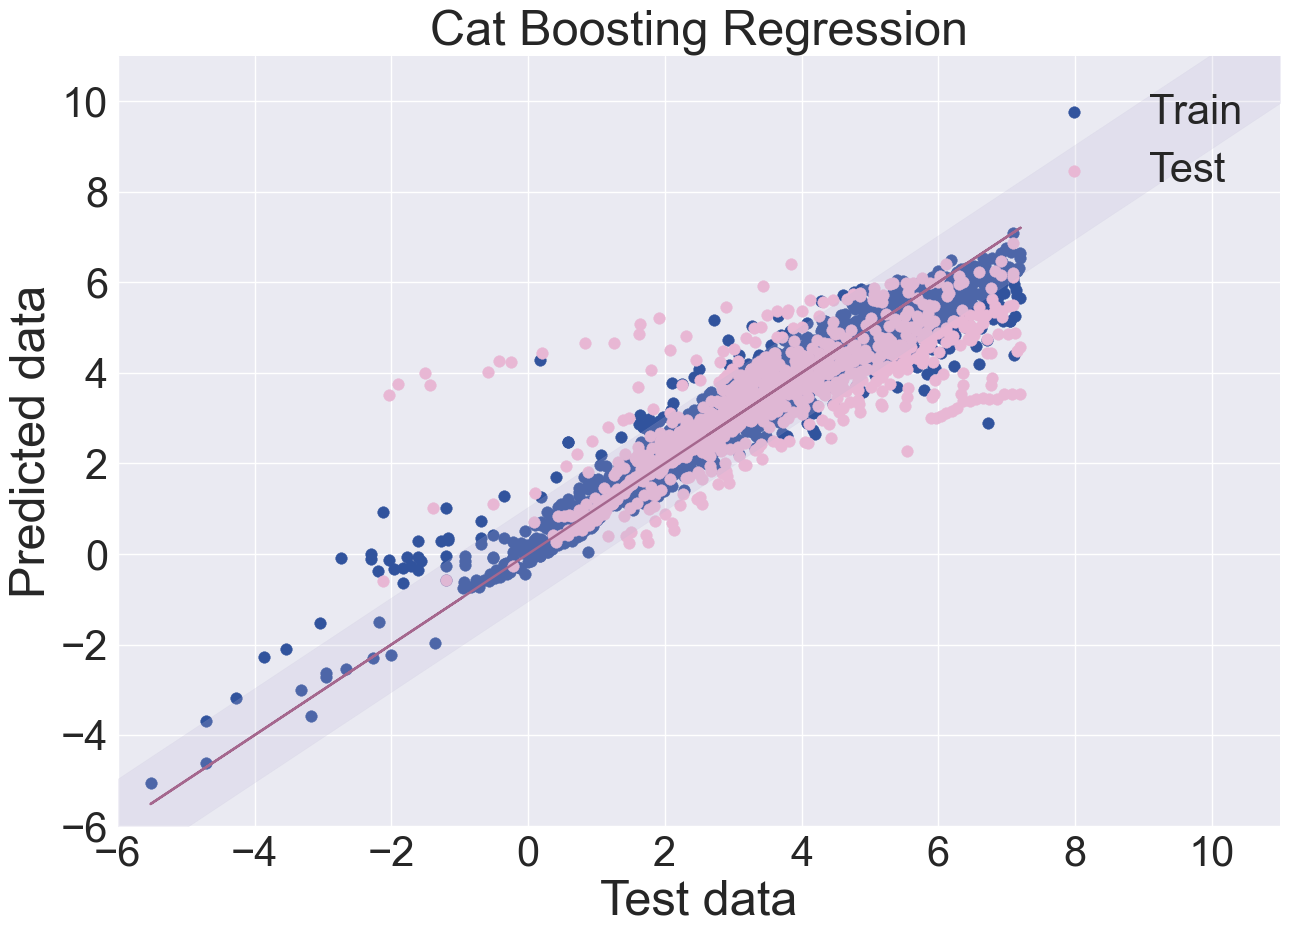

In [16]:
df_error_train3 = pd.DataFrame()
# We split the sample so that there are different systems in the test and training
y = db_final.loc[:,'Viscosity, cP']
x = db_final.loc[:,'X#1 (molar fraction)':]
cv = custom_cv(x, y, db_final['ind_syst'], 1, 0.2) #Separation using the function
for train_idx, val_idx in cv:
    x_train, x_test = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]
x_train = x_train.copy().drop(['ind_syst'],axis=1)
x_test = x_test.copy().drop(['ind_syst'],axis=1)
sample_w = compute_sample_weight('balanced', y=(x_train[['I','II','III','IV','V']]))
#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#CBR
with open('viscosity_model.pkl', 'rb') as file: 
 pickle_model = pickle.load(file)
regr_CBR = pickle_model
regr_CBR.fit(x_train, y_train, sample_weight=sample_w)
y_pred = regr_CBR.predict(x_test)
y1_pred = regr_CBR.predict(x_train)
#Calculating metrics
df_error_train3['Cat Boosting Regression'] = regr_metrics(regr_CBR, x_train, y_train, y_test, y_pred, y1_pred)
#Plotting a graph
regr_plot(y_train, y_test, y_pred, y1_pred)
plt.title('Cat Boosting Regression', fontsize=35)

In [17]:
df_error_train3

,Cat Boosting Regression
0,0.923927
1,0.602304
2,0.452660
3,1.039652


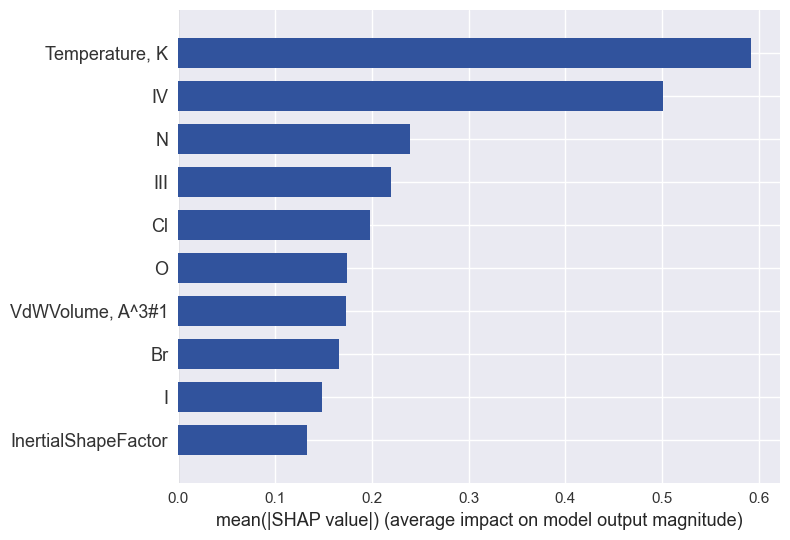

In [18]:
regr_feature(regr_CBR, x_test, list_columns)

In [19]:
#Saving the model
import pickle
filename = 'viscosity_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(regr_CBR, file)
    file.close()